Persoalan Pertama:
- Cek apakah format data sudah sesuai
- Cek apakah ada data yang kosong dan outliers(data yang bernilai ekstrem), jika ada bagaimana mengatasinya?
- Apakah ada variabel baru yang bisa memberikan insight lebih?
- Apakah ada pola aneh dalam data? Bisakah kamu memperlihatkannya?
- Apakah ada relasi antara latar belakang/kondisi pelanggan terhadap kebiasaan berbelanja?  

Persoalan Kedua:
- Kampanye iklan mana yang paling sukses?
- Gambaran umum mengenai latar belakang pelanggan 
- Produk apa yang banyak diminati pelanggan?
- Melalui apa pelanggan banyak berbelanja?(Toko, Website, Katalog, Diskon)
- Bagaimana relasi antara respon terhadap iklan dengan jumlah tanggungan?
- Bagaimana relasi antara pengeluaran dengan jumlah tanggungan?

In [25]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [26]:
df = pd.read_csv('ifood_df.csv')
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014.0,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


1. Apakah format Data Sesuai?

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

- Berdasarkan hasil diatas, format data sudah sesuai

In [28]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

- Tidak ada kolom yang kosong pada data, maka proses boleh dilanjutkan

In [29]:
df.duplicated().sum()

184

- Terdapat 184 baris data yang duplikasi, data tersebut harus dihapus karena dapat mengganggu analisa data

In [30]:
df.drop_duplicates(keep=False, inplace=True)
df.shape

(1843, 39)

In [31]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,...,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000,1843.000000
mean,51755.752577,0.443842,0.512751,48.734129,307.167119,26.308193,166.813348,37.400977,27.416712,43.837222,...,0.244710,0.034726,0.091156,0.023874,0.500271,0.166576,0.218123,565.106348,521.269126,0.305480
std,20727.936663,0.534853,0.548639,28.951696,337.913890,39.733319,222.103689,54.895591,42.066386,51.690589,...,0.430032,0.183135,0.287909,0.152698,0.500136,0.372698,0.413083,577.679708,555.773676,0.680508
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.000000
25%,35683.000000,0.000000,0.000000,24.000000,23.500000,2.000000,16.000000,2.500000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,42.000000,0.000000
50%,51650.000000,0.000000,0.000000,49.000000,179.000000,8.000000,68.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,344.000000,290.000000,0.000000
75%,68145.000000,1.000000,1.000000,74.000000,508.000000,33.000000,225.000000,50.000000,34.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.500000,883.000000,0.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,197.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.000000


In [32]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

In [33]:
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,26816.0,0,0,50,5,1,6,3,4,3,...,0,0,0,0,1,0,0,19,16,0
2200,61223.0,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2202,56981.0,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245.0,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


- Nilai Outlier pada suatu data dapat memberikan informasi yang keliru, sehingga pada analisa machine learning outlier tersebut dapat mengganggu metodenya.

In [34]:
remove_columns = ['Kidhome', 'Teenhome','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response','marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow','education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD','AcceptedCmpOverall','MntTotal']
df_outlier = df.drop(columns=remove_columns)
df_outlier.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Customer_Days',
       'MntRegularProds'],
      dtype='object')

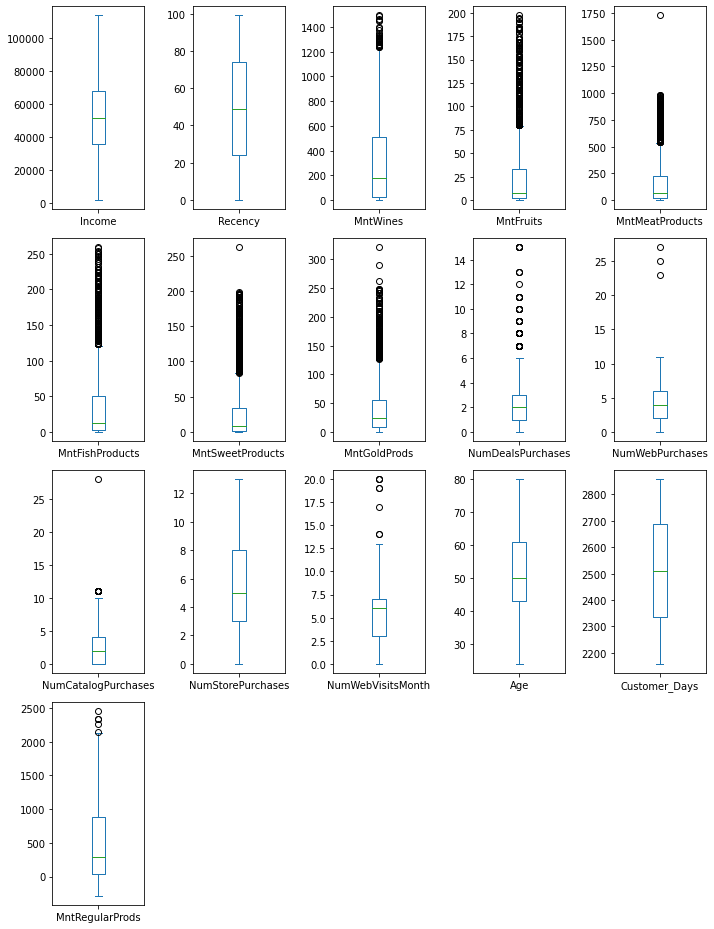

In [35]:
df_outlier.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

- Data yang memiliki outlier sedikit akan dibuang (digantikan nilai mean atau median)
- Sedangkan data yang memiliki outlier terlalu banyak tidak dibuang, karena menurut definisinya outlier tersebut jarang terjadi, fenomena itu berarti ada sesuatu yang kasuistik pada data yang perlu telaah lebih lanjut.

- Data diatas yang akan digantikan nilai outliernya adalah NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumWebVisitsMonth, MntRegularProds

Tindakan Mengatasi outlier yang saya gunakan menggunakan Jangkauan antar kuartil(IQR) dimana nilai diatas batas atas akan kita ganti dengan nilai median

In [36]:
deals_median = df_outlier['NumDealsPurchases'].median()
Q1 = df_outlier['NumDealsPurchases'].quantile(0.25)

Q3 = df_outlier['NumDealsPurchases'].quantile(0.75)

IQR = Q3 - Q1

deals_outlier = Q3 + 1.5*IQR

In [37]:
df['NumDealsPurchases'] = np.where(df['NumDealsPurchases'] >deals_outlier, deals_median,df['NumDealsPurchases'])

In [38]:
web_median = df_outlier['NumWebPurchases'].median()
Q1 = df_outlier['NumWebPurchases'].quantile(0.25)
Q3 = df_outlier['NumWebPurchases'].quantile(0.75)
IQR = Q3-Q1
web_outlier = Q3+1.5*IQR

In [39]:
df['NumWebPurchases'] = np.where(df['NumWebPurchases'] >web_outlier, web_median,df['NumWebPurchases'])

In [40]:
cat_median = df_outlier['NumCatalogPurchases'].median()
Q1 = df_outlier['NumCatalogPurchases'].quantile(0.25)
Q3 = df_outlier['NumCatalogPurchases'].quantile(0.75)
IQR = Q3-Q1
cat_outlier = Q3+1.5*IQR

In [41]:
df['NumCatalogPurchases'] = np.where(df['NumCatalogPurchases'] >cat_outlier, cat_median,df['NumCatalogPurchases'])

In [42]:
visit_median = df_outlier['NumWebVisitsMonth'].median()
Q1 = df_outlier['NumWebVisitsMonth'].quantile(0.25)
Q3 = df_outlier['NumWebVisitsMonth'].quantile(0.75)
IQR = Q3-Q1
visit_outlier = Q3+1.5*IQR

In [43]:
df['NumWebVisitsMonth'] = np.where(df['NumWebVisitsMonth'] >visit_outlier, visit_median,df['NumWebVisitsMonth'])

In [46]:
Reg_median = df_outlier['MntRegularProds'].median()
Q1 = df_outlier['MntRegularProds'].quantile(0.25)
Q3 = df_outlier['MntRegularProds'].quantile(0.75)
IQR = Q3-Q1
reg_outlier = Q3+1.5*IQR

In [47]:
df['MntRegularProds'] = np.where(df['MntRegularProds'] >reg_outlier, Reg_median,df['MntRegularProds'])

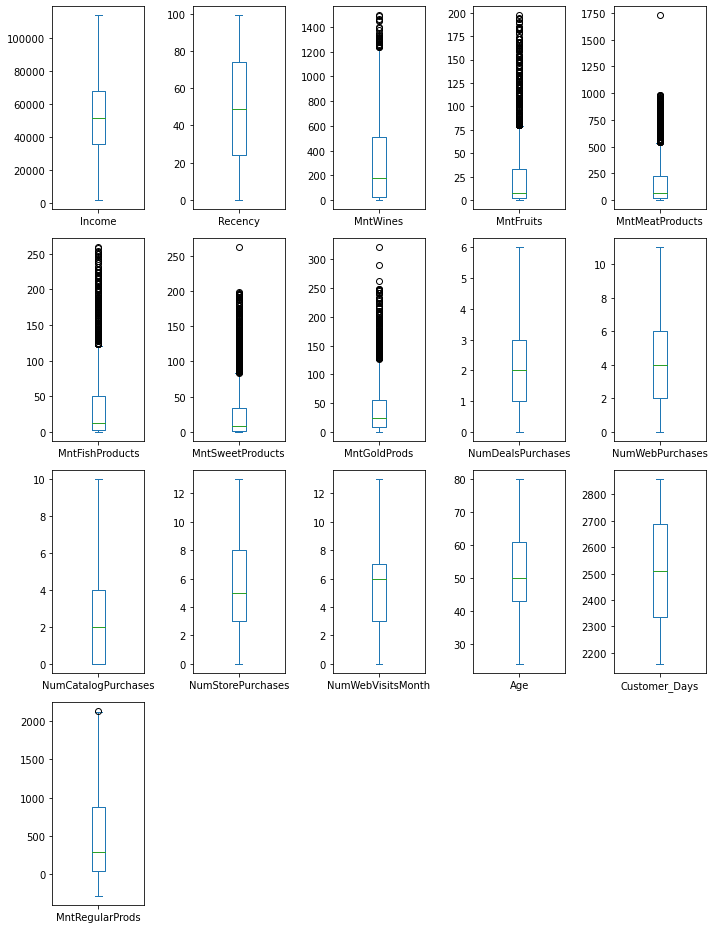

In [48]:
df_outlier_cleaned = df.drop(columns=remove_columns)

df_outlier_cleaned.plot(subplots=True, layout=(5,5), kind='box', figsize=(10,16))
plt.tight_layout()

- Beberapa variabel yang memiliki Outliers yang sedikit sudah ditangani. Langkah selanjutnya membuat variabel baru yang dapat memberikan insight ke depannya.

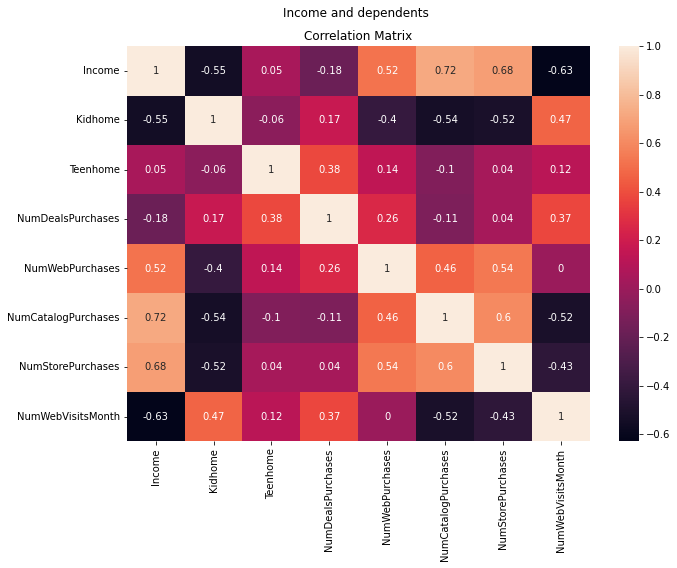

In [54]:
df_indep = pd.DataFrame(df[['Income','Kidhome','Teenhome','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']])

plt.figure(figsize=(10,8))
sns.heatmap(df_indep.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Income and dependents')
plt.tight_layout()

- Terlihat bahwa variabel **Income** mempunyai korelasi pada **Web, Catalog, dan Store** artinya jika income seseorang meningkat maka kebiasaan membeli juga meningkat.
- Apabila seseorang mempunyai anak (**Kidhome**) maka korelasi yang terbesar adalah sering mencari barang di internet daripada pergi ke toko maupun katalog
- Hal yang unik dari data tersebut adalah kunjungan ke website tidak terlalu berpengaruh terhadap penjualan pada website, variable kunjungan website **VisitsMonth** memiliki korelasi positif terhadap Deals/Diskon, sehingga asumsinya pembeli lebih tertarik membeli di website apabila ada Deals/Diskon

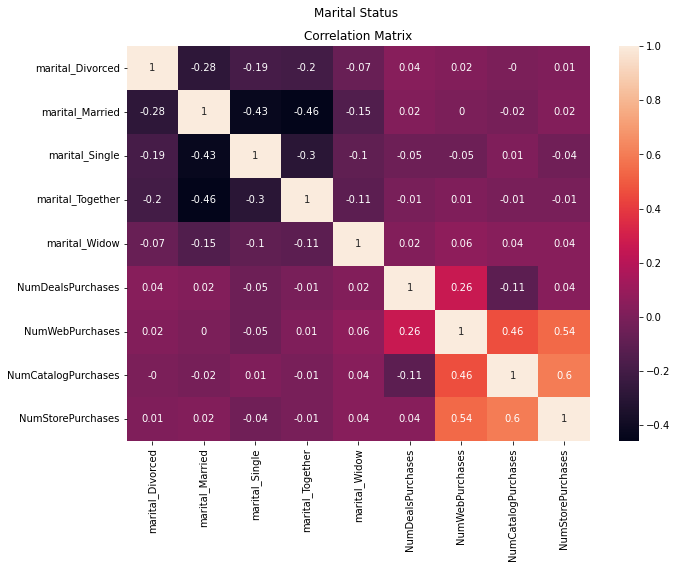

In [55]:
df_marital = pd.DataFrame(df[['marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow','NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases']])

plt.figure(figsize=(10,8))
sns.heatmap(df_marital.corr().round(2), annot=True)
plt.title('Correlation Matrix')
plt.suptitle('Marital Status')
plt.tight_layout()

**Marital Status** tidak memiliki korelasi apapun terhadap penjualan

In [57]:
df['education_MasterDegree'] = df['education_2n Cycle'] + df['education_Master'] #2n cycle dan master adalah sama
#sehingga dijadikan 1 kolom saja

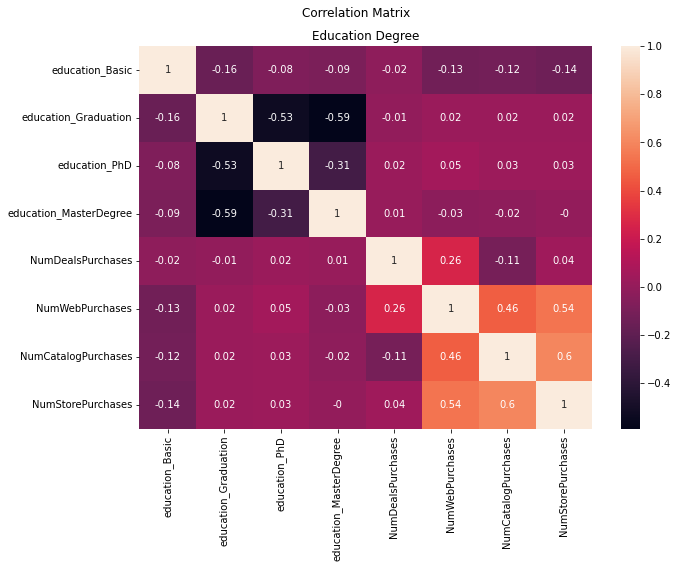

In [58]:
df_education = pd.DataFrame(df[['education_Basic', 'education_Graduation', 'education_PhD','education_MasterDegree',
       'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']])

plt.figure(figsize=(10,8))
sns.heatmap(df_education.corr().round(2),annot=True)
plt.suptitle('Correlation Matrix')
plt.title('Education Degree')
plt.tight_layout() 

**Education Degree** tidak menampilkan korelasi terhadap penjualan

# Visualisasi Menggunakan Dashboard PowerBI di Github